In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
#Loading and Visualizing the data
dataset = pd.read_csv('pimaindiansdiabetes.csv')
dataset.sample(10)

,Pregnancy Count,Blood Glucose,Diastolic BP,Triceps Skin Fold Thickness,Serum Insulin,BMI,Diabetes Pedigree Function,Age,Class
536,0,105,90,0,0,29.6,0.197,46,0
675,6,195,70,0,0,30.9,0.328,31,1
405,2,123,48,32,165,42.1,0.520,26,0
123,5,132,80,0,0,26.8,0.186,69,0
721,1,114,66,36,200,38.1,0.289,21,0
553,1,88,62,24,44,29.9,0.422,23,0
420,1,119,88,41,170,45.3,0.507,26,0
198,4,109,64,44,99,34.8,0.905,26,1
293,1,128,48,45,194,40.5,0.613,24,1
299,8,112,72,0,0,23.6,0.840,58,0


In [6]:
#Out of 8 features just focusing on two Features i.e. Blood Glucose and Body Mass Index (BMI).
focus_dataset = dataset[["Blood Glucose", "BMI", "Class"]]
focus_dataset.is_copy = False

x1_min, x1_max = focus_dataset["Blood Glucose"].min(), focus_dataset["Blood Glucose"].max()
x1_avg = np.mean(focus_dataset["Blood Glucose"])

x2_min, x2_max = focus_dataset["BMI"].min(), focus_dataset["BMI"].max()
x2_avg = np.mean(focus_dataset["BMI"])

print ("Blood Glucose: min = %d, max = %d, mean = %0.2f % (x1_min, x1_max, x1_avg)")
print ("BMI: min = %0.1f, max = %0.1f, mean = %0.2f % (x2_min, x2_max, x2_avg)")

focus_dataset.sample(10)

Blood Glucose: min = %d, max = %d, mean = %0.2f % (x1_min, x1_max, x1_avg)
BMI: min = %0.1f, max = %0.1f, mean = %0.2f % (x2_min, x2_max, x2_avg)


,Blood Glucose,BMI,Class
708,164,32.8,1
447,95,36.5,0
309,124,32.9,1
438,97,18.2,0
247,165,52.3,0
682,95,44.6,0
543,84,39.5,0
461,71,21.8,0
439,107,36.8,0
634,92,25.9,0


In [10]:
# filtering the data out of 0-valued instances
real_bg = focus_dataset["Blood Glucose"] != 0
real_bmi = focus_dataset["BMI"] != 0

focus_dataset = focus_dataset[real_bg & real_bmi]

x1_min, x1_max = focus_dataset["Blood Glucose"].min(), focus_dataset["Blood Glucose"].max()
x1_avg = np.mean(focus_dataset["Blood Glucose"])

x2_min, x2_max = focus_dataset["BMI"].min(), focus_dataset["BMI"].max()
x2_avg = np.mean(focus_dataset["BMI"])

print ("Blood Glucose: min = %d, max = %d, mean = %0.2f % (x1_min, x1_max, x1_avg)")
print ("BMI: min = %0.1f, max = %0.1f, mean = %0.2f % (x2_min, x2_max, x2_avg)")

focus_dataset.sample(10)

Blood Glucose: min = %d, max = %d, mean = %0.2f % (x1_min, x1_max, x1_avg)
BMI: min = %0.1f, max = %0.1f, mean = %0.2f % (x2_min, x2_max, x2_avg)


,Blood Glucose,BMI,Class
317,182,30.5,1
648,136,28.3,1
11,168,38.0,1
142,108,32.5,0
259,155,33.3,1
231,134,46.2,1
219,112,37.8,1
691,158,42.3,1
42,106,22.7,0
727,141,32.4,0


In [11]:
#Scaling the features
def scale_features(X, scalar=None):
    if(len(X.shape) == 1):
        X = X.reshape(-1, 1)
    
    if scalar == None:
        scalar = StandardScaler()
        scalar.fit(X)
  
    return scalar.transform(X), scalar

In [12]:
# Scaling the features
size = len(focus_dataset)
training_size = np.floor(size * 0.7).astype(int)

training_portion = focus_dataset.loc[:training_size, ("Blood Glucose", "BMI")]
test_portion = focus_dataset.loc[training_size:, ("Blood Glucose", "BMI")]

focus_dataset.loc[:training_size, ("Blood Glucose", "BMI")], train_scalar = scale_features(training_portion)
focus_dataset.loc[training_size:, ("Blood Glucose", "BMI")],_ = scale_features(test_portion, scalar=train_scalar)

x1_min, x1_max = focus_dataset["Blood Glucose"].min(), focus_dataset["Blood Glucose"].max()
x2_min, x2_max = focus_dataset["BMI"].min(), focus_dataset["BMI"].max()

focus_dataset.sample(10)

,Blood Glucose,BMI,Class
551,-1.245472,-0.063128,0
589,-1.604255,-1.576564,0
121,-0.364823,0.259178,0
397,0.287510,0.273191,1
281,0.222276,0.497404,0
189,0.548443,-0.105168,1
483,-1.245472,0.819710,0
609,-0.364823,-1.170179,0
146,-2.126121,0.062992,0
232,-1.408555,-0.973992,0


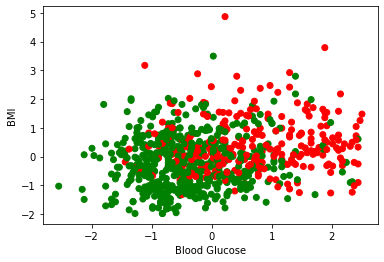

In [13]:
#Visualizing the Scatter plot
plt.figure()

colors = ['green' if diagnosis == 0 else 'red' for diagnosis in focus_dataset["Class"]]
plt.scatter(focus_dataset["Blood Glucose"], focus_dataset["BMI"], c=colors)

plt.xlabel("Blood Glucose")
plt.ylabel("BMI")

plt.show()

In [14]:
#Building SVM Models.
#Spitting the data into training and testing part.
X_train = focus_dataset[["Blood Glucose", "BMI"]][:training_size]
y_train = focus_dataset["Class"][:training_size]

X_test = focus_dataset[["Blood Glucose", "BMI"]][training_size:]
y_test = focus_dataset["Class"][training_size:]

In [16]:
#Implementing on Linear Kernel
model = SVC(kernel='linear', C = 1.0)
model.fit(X_train, y_train)

mean_accuracy = model.score(X_test, y_test)

mean_accuracy_train = model.score(X_train, y_train)
mean_accuracy_test = model.score(X_test, y_test)

print ("Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)")
print ("Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)")

Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)
Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)


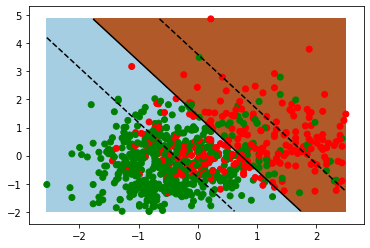

In [17]:
plt.figure()  # we just create a metaplotlib figure as usual

# we create the coordinate matrix for the colored meshes
# instead of using the features values directly like we did before
# we use ranges of between min and max of each feature with 0.01 step to make the boundaries smoother
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

# we calculate the z values for the colored mesh
# we use .ravel() to faltten the matricies and np.c_ to concatnate them
z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# here we plot the colored meshes
# notice that we use the z > 0: this will create 2 colors, one for values of z > 0, the other for z <= 0
# if we used all z directly we'll get so many colors for each value that z can take
plt.pcolormesh(xx, yy, z > 0, cmap=cm.Paired)

# here we plot the lines of the optimal hypreplane the maximum margin
# these lines are the contours of the regions where z value are -1, 0, 1
plt.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1., 0, 1.])

# this is our regular scatter plot of the data points
plt.scatter(focus_dataset["Blood Glucose"], focus_dataset["BMI"], c=colors)

# here we sacctter some big circles in the positions of the support vectors
# this will result in the support vectors datapoints being circled
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,facecolors='none')

# we finally show the plot!
plt.show()

In [19]:
#Implementing on RBF Kernel
model = SVC(kernel='rbf', gamma = 1.0, C = 1.0)
model.fit(X_train, y_train)

mean_accuracy_train = model.score(X_train, y_train)
mean_accuracy_test = model.score(X_test, y_test)

print ("Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)")
print ("Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)")

Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)
Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)


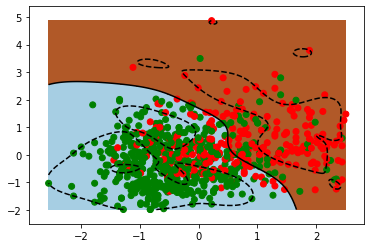

In [20]:
#Visualizing the non-linear solution using the same script as linear kernel
plt.figure()

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z > 0, cmap=cm.Paired)
plt.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1., 0, 1.])
plt.scatter(focus_dataset["Blood Glucose"], focus_dataset["BMI"], c=colors)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,facecolors='none')

In [22]:
#Producing even more non-linear solution by increasing the value of  𝛾 , let's put it to 10 and see what happens.
model = SVC(kernel='rbf', gamma = 10.0, C = 1.0)
model.fit(X_train, y_train)

mean_accuracy_train = model.score(X_train, y_train)
mean_accuracy_test = model.score(X_test, y_test)

print ("Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)")
print ("Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)")

Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)
Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)


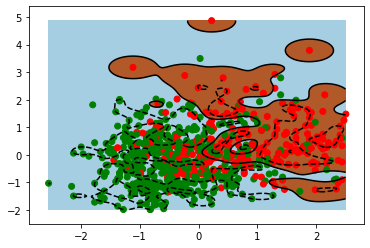

In [23]:
#Visualizing the complexity of the non-linear solutions by plotting the data into grouped islands.
plt.figure()

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z > 0, cmap=cm.Paired)
plt.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1., 0, 1.])
plt.scatter(focus_dataset["Blood Glucose"], focus_dataset["BMI"], c=colors)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,facecolors='none')

In [26]:
#Implementing on Polynomial Kernel
model = SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

mean_accuracy_train = model.score(X_train, y_train)
mean_accuracy_test = model.score(X_test, y_test)

print ("Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)")
print ("Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)")

Mean Accuracy on Train Data: %0.3f % (mean_accuracy_train)
Mean Accuracy on Test Data: %0.3f % (mean_accuracy_test)


C:\Users\Ravindra K Patra\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


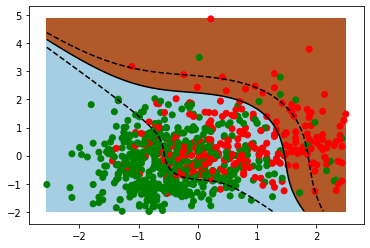

In [27]:
#Visualizing the non-linearity of the model which is less complex than RBF Kernel.
plt.figure()

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z > 0, cmap=cm.Paired)
plt.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1., 0, 1.])
plt.scatter(focus_dataset["Blood Glucose"], focus_dataset["BMI"], c=colors)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,facecolors='none')